In [1]:
import pandas as pd

df = pd.read_csv("CSV_Data_File_2.csv", sep = ";") #import raw data 

## Primary data cleaning

In [2]:
df=df.drop(columns = ["typus"]) #drop column Typus (as not consistent)
df=df.dropna() #drop all rows with NaN values
df=df.reset_index(drop=True) # reset the index to avoid errors
df

,price,rooms,squareM,address
0,4940.0,5.5,150,"Zwyssigstrasse 9, 8048 Zürich"
1,2700.0,3.5,102,"Ruedi Walter-Str. 4, 8050 Zürich"
2,3190.0,2.5,72,"Kochstrasse 19, 8004 Zurich, 8004 Zurich"
3,2250.0,2.0,53,"Hammerstr. 8, 8008 Zurich"
4,3450.0,2.5,60,"Mühlebachstrasse, 8008 Zurich"
...,...,...,...,...
3903,4340.0,1.0,50,"Rue de la Mairie, 1207 Genève"
3904,4805.0,1.0,42,"Rue du Nant 30, 1207 Genève"
3905,5921.0,2.0,72,"30 Rue du Nant, 1207 Genève"
3906,6045.0,2.0,73,"Rue du Nant 30, 1207 Genève"


## Obtain Latitude & Longitude from address variable

In [ ]:
#ATTENTION: DO NOT EXECUTE THIS BLOCK, SIMPLY IMPORT THE FILE (SEE FOLLOWING BLOCK OF CODE)

#from geopy.geocoders import Nominatim

locator = Nominatim(user_agent="myGeocoder") #set locator

df["latitude"] = "y" #insert column placeholder for latitude
df["longitude"] = "y"  #insert column placeholder for Longitude

idx=0
for addresses in df["address"]:   #transforming the address into Latitude & longitude
    try:                               
        location = locator.geocode(addresses)
        df["latitude"][idx] = location.latitude
        df["longitude"][idx] = location.longitude
        print(location.longitude)
        print(idx)
        idx=idx+1
    except:
        df["latitude"][idx] = "nono"
        df["longitude"][idx] = "nono"
        idx=idx+1
        print(idx)

In [1]:
import pandas as pd

df = pd.read_csv("CSV_Data_File_LL.csv", sep = ";") #import raw data 

In [2]:
df.dtypes

Unnamed: 0         int64
price            float64
rooms            float64
squareM          float64
address           object
latitude         float64
longitude        float64
squareM/rooms    float64
dtype: object

## Secondary data cleaning

In [3]:
df=df.drop(columns = ["Unnamed: 0"]) ##only execute this colum if you imported the longitude/latitude data from the .csv file

# drop all rows that were not mapped correctly
df = df[~df['latitude'].isin(['nono'])] 
df = df[~df['longitude'].isin(['nono'])]
df = df[~df['squareM'].isin(['nono'])]

# get rid of thousand seperator
df["squareM"] = df["squareM"].replace("’","").astype(float) 

#convert variables into float
df["latitude"] = df.latitude.astype(float) 
df["longitude"] = df.longitude.astype(float)
df["squareM"] = df.squareM.astype(float)

#add extra variables
df["squareM/rooms"] = df["squareM"]/df["rooms"]

df.dtypes

price            float64
rooms            float64
squareM          float64
address           object
latitude         float64
longitude        float64
squareM/rooms    float64
dtype: object

In [4]:
import numpy as np
# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df["price"] >= np.percentile(df["price"], 0.5)) & 
 (df["price"] <= np.percentile(df["price"], 99.5)) & 
 (df["latitude"] >= np.percentile(df["latitude"], 0.05)) & 
 (df["latitude"] < np.percentile(df["latitude"], 99.95)) &
 (df["longitude"] >= np.percentile(df["longitude"], 0.05)) & 
 (df["longitude"] <= np.percentile(df["longitude"], 99.95))]

In [5]:
df.dropna(inplace=True) #drop all rows with NaN values

In [6]:
#df.to_csv("CSV_Data_File_LL.csv", sep=';') #create back up copy DO NOT EXECUTE!!!!!!!!!!!!!!!!

## Visualizing the Data

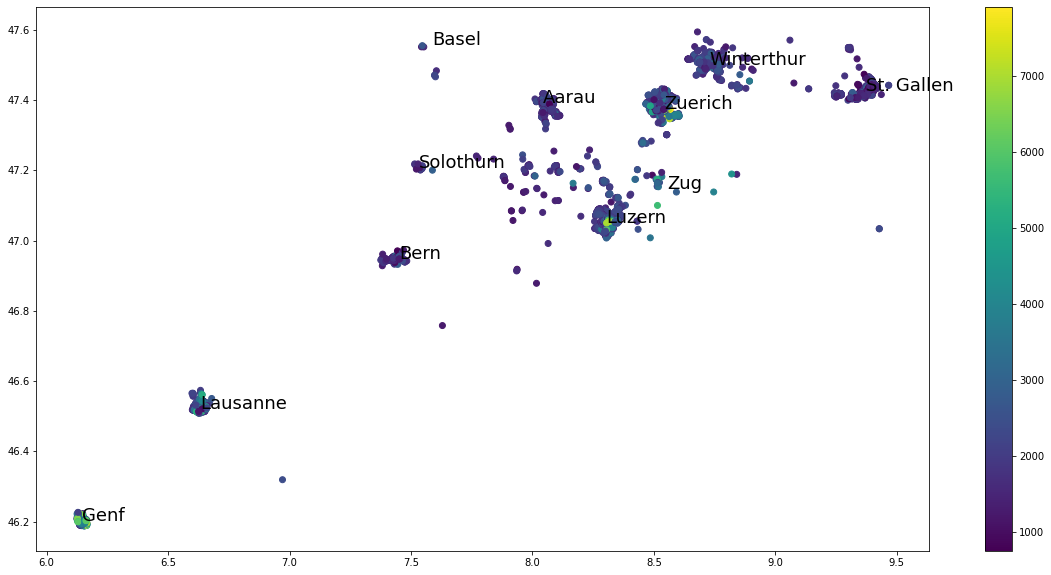

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(df["longitude"], df["latitude"], c=df["price"])
plt.colorbar()

orte = ["Zuerich", "Luzern", "Winterthur", "St. Gallen", "Aarau", "Zug", "Bern", "Basel", "Solothurn", "Lausanne", "Genf"]
lat_cities = [47.3744489, 47.0505452, 47.4991723, 47.425012, 47.3927146, 47.1486137, 46.9482713, 47.5581077, 47.2076, 46.5218269, 46.2017559]
lon_cities = [8.5410422, 8.3054682, 8.7291498, 9.374097, 8.0444448, 8.5539378, 7.4514512, 7.5878261, 7.5308284, 6.6327025, 6.1466014]

idx = 0
for ort in orte:
    plt.annotate(ort, (lon_cities[idx], lat_cities[idx]), size = 18)
    idx = idx + 1 

plt.show()

In [8]:
df

,price,rooms,squareM,address,latitude,longitude,squareM/rooms
0,4940.0,5.5,150.0,"Zwyssigstrasse 9, 8048 Zürich",47.383785,8.485429,27.272727
1,2700.0,3.5,102.0,"Ruedi Walter-Str. 4, 8050 Zürich",47.415085,8.541887,29.142857
2,3190.0,2.5,72.0,"Kochstrasse 19, 8004 Zurich, 8004 Zurich",47.377975,8.515568,28.800000
3,2250.0,2.0,53.0,"Hammerstr. 8, 8008 Zurich",47.359566,8.558369,26.500000
4,3450.0,2.5,60.0,"Mühlebachstrasse, 8008 Zurich",47.356407,8.558874,24.000000
...,...,...,...,...,...,...,...
3684,4340.0,1.0,50.0,"Rue de la Mairie, 1207 Genève",46.202064,6.158987,50.000000
3685,4805.0,1.0,42.0,"Rue du Nant 30, 1207 Genève",46.203218,6.162777,42.000000
3686,5921.0,2.0,72.0,"30 Rue du Nant, 1207 Genève",46.203218,6.162777,36.000000
3687,6045.0,2.0,73.0,"Rue du Nant 30, 1207 Genève",46.203218,6.162777,36.500000


## Splitting the data into train & test sets

In [9]:
X = df.drop(columns = ["price", "address"])
Y = df["price"]
# Sampling train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

## Regression K-Nearest Neigbors

In [10]:
#searching for optimal k

from sklearn import neighbors
from sklearn import metrics 
from sklearn.metrics import mean_absolute_percentage_error

score_val = [] #to store mape values for different k

for K in range(100):
    K = K+1
    KNNmodel = neighbors.KNeighborsRegressor(n_neighbors = K)
    KNNmodel.fit(X_train, Y_train)  #fit the model
    Y_pred = KNNmodel.predict(X_test)
    knnMapeScore = mean_absolute_percentage_error(Y_test, Y_pred)
    score_val.append(knnMapeScore) #store mape values
    #print('Score for k=' , K , 'is:', knnMapeScore)

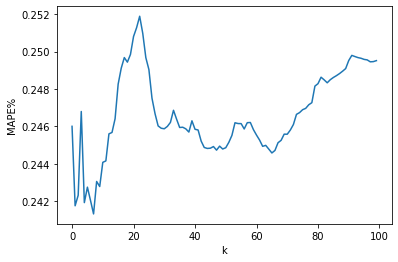

In [11]:
# plotting MAPE% and k to identify optimal k
plt.plot(score_val)
plt.ylabel('MAPE%')
plt.xlabel('k')
plt.show()

### now we know k=4 is optimal

In [12]:
k=4

KNNmodel = neighbors.KNeighborsRegressor(n_neighbors = k)

KNNmodel.fit(X_train, Y_train)  #fit the model
Y_pred = KNNmodel.predict(X_test) #make prediction on test set
KNNmodelMapeScore = mean_absolute_percentage_error(Y_test,Y_pred) #calculate mape

print("The KNN Model achieved a MAPE of: ", round(KNNmodelMapeScore*100,1),"%")

The KNN Model achieved a MAPE of:  24.7 %


## Regression Tree & Random Forest

In [13]:
# Regression tree
from sklearn.tree import DecisionTreeRegressor # Decision Decision Tree Regressor
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_absolute_percentage_error
# Create Decision Tree 
RTmodel = DecisionTreeRegressor(max_depth=4, random_state = 5)

# Train Decision Tree
RTmodel = RTmodel.fit(X_train, Y_train)

Y_pred = RTmodel.predict(X_test) #make prediction on test set

RTModelMapeScore = mean_absolute_percentage_error(Y_test, Y_pred)

print("The Regression Tree Model achieved a MAPE of: ", round(RTModelMapeScore*100,1),"%")

The Regression Tree Model achieved a MAPE of:  24.5 %


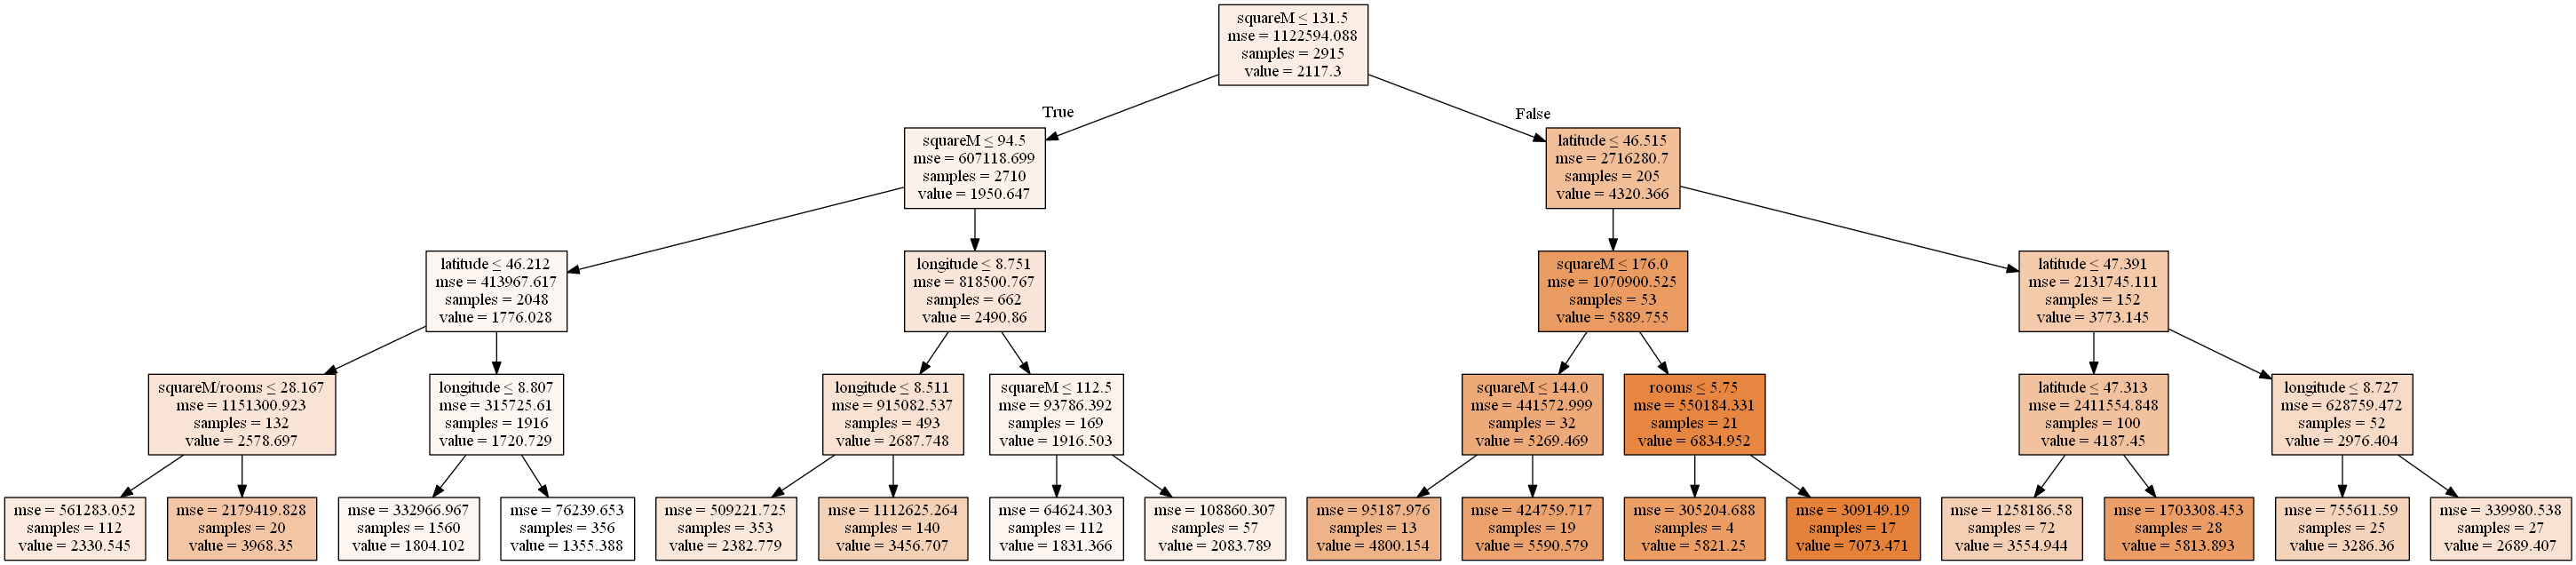

In [14]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(RTmodel, 
                out_file=dot_data,
                filled=True, 
                rounded=False,
                special_characters=True,
                feature_names = list(X_train.columns),
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('reg_tree.png')
Image(graph.create_png())

In [ ]:
# searching for best hyperparameters in Random Forest
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
treesx = 0
depthx = 0
treelist = []
depthlist = []
bestMape = 1
mapeslist = []
for trees in range(50, 200, 5):
    for depth in range (1, 50, 5):
        RFmodel = RandomForestRegressor(n_estimators=trees, #default would be 100
                                   max_depth=depth) #default would be 0
        RFmodel.fit(X_train,Y_train)

        Y_pred = RFmodel.predict(X_test) #make prediction on test set

        RFmodelMapeScore = mean_absolute_percentage_error(Y_test, Y_pred)

        #print("The Random Forest Model achieved a MAPE of: ", round(RFmodelMapeScore*100,1),"%")
        mapeslist.append(RFmodelMapeScore)
        depthlist.append(depth)
        treelist.append(trees)
        
        if RFmodelMapeScore < bestMape:
            bestMape = RFmodelMapeScore
            treesx = trees
            depthx = depth
            
print("Best MAPE achieved; ",round(bestMape*100,1))
print("Depth: ", depthx)
print("Trees: ", treesx)

In [79]:
# Random forest regression
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

RFmodel = RandomForestRegressor(n_estimators=treesx,
                           max_depth=depthx)
RFmodel.fit(X_train,Y_train)

Y_pred = RFmodel.predict(X_test) #make prediction on test set

RFmodelMapeScore = mean_absolute_percentage_error(Y_test, Y_pred)

print("The Random Forest Model achieved a MAPE of: ", round(RFmodelMapeScore*100,1),"%")

The Random Forest Model achieved a MAPE of:  13.9 %


## Neural Network

In [81]:
from sklearn.preprocessing import StandardScaler

# Scaling the data 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import keras
import tensorflow as tf

model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation="relu")) # adding hitten layers to the NN
model.add(keras.layers.Dense(70, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(1, activation = "linear"))

model.compile(loss="mean_absolute_percentage_error",
              optimizer="adam",             #Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
              metrics=["mean_absolute_percentage_error"])

# Train the model
history = model.fit(X_train,
                    Y_train,
                    epochs=300,
                    validation_split = 0.2,
                    verbose=0 )

# Evaluate the model
NNmodelMapeScore=model.evaluate(X_test, Y_test)
print("The Neural Network Model achieved a MAPE of: ", round(NNmodelMapeScore[1],1),"%")

In [34]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_percentage_error,val_loss,val_mean_absolute_percentage_error,epoch
295,14.023276,14.023276,14.258016,14.258016,295
296,13.968781,13.968781,14.270778,14.270778,296
297,13.869319,13.869319,14.367637,14.367637,297
298,13.846806,13.846806,15.031804,15.031804,298
299,14.134412,14.134412,14.285794,14.285794,299


In [2]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([10, 30])
    plt.xlim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    
plot_loss(history)

NameError: name 'history' is not defined

## Model Comparison (MAPE)

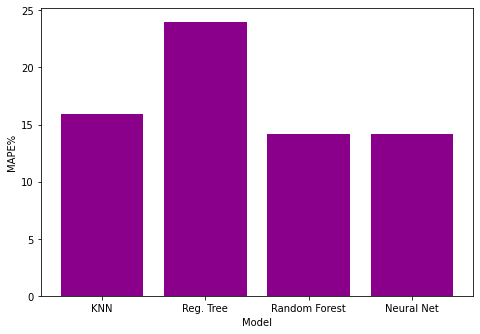

In [84]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xlabel('Model')
plt.ylabel('MAPE%')
models = ["KNN", 'Reg. Tree', 'Random Forest', "Neural Net"]
mapes = [KNNmodelMapeScore*100,RTModelMapeScore*100,RFmodelMapeScore*100,NNmodelMapeScore[1]]
ax.bar(models,mapes, color="darkmagenta")
plt.show()